In [1]:
import numpy as np
import pandas as pd
from fbprophet import Prophet
from fbprophet.plot import add_changepoints_to_plot
import warnings
warnings.filterwarnings('ignore')

In [2]:
def NSE(y_pred, y_true):
    y_mean = np.mean(y_true)
    a = np.sum(np.square(y_true[:16] - y_pred[:16]))
    b = np.sum(np.square(y_true[:16] - y_mean))
    c = np.sum(np.square(y_true[16:] - y_pred[16:]))
    d = np.sum(np.square(y_true[16:] - y_mean))
    return 100 * (1 - 0.65 * a / b - 0.35 * c / d)

# 2017

In [3]:
water = pd.read_excel('../input/入库流量数据.xlsx')
water.head()

y_test1 = water.loc[(water['TimeStample'] >= '2017-02-01 02:00:00') & (water['TimeStample'] <= '2017-02-07 23:00:00')]
y_test2 = water.loc[(water['TimeStample'] >= '2017-08-01 02:00:00') & (water['TimeStample'] <= '2017-08-07 23:00:00')]
y_test3 = water.loc[(water['TimeStample'] >= '2017-11-01 02:00:00') & (water['TimeStample'] <= '2017-11-07 23:00:00')]
print(y_test1.shape, y_test2.shape, y_test3.shape)

y_test1 = y_test1['Qi'].values
y_test2 = y_test2['Qi'].values
y_test3 = y_test3['Qi'].values

(56, 2) (56, 2) (56, 2)


In [4]:
train_test1 = pd.read_csv('../input/train_test1_2017.csv')
train_test2 = pd.read_csv('../input/train_test2_2017.csv')
train_test3 = pd.read_csv('../input/train_test3_2017.csv')

In [5]:
train1 = train_test1.loc[train_test1['Qi'].notnull(), :]
# test1 = train_test1.loc[train_test1['Qi'].isnull(), :]
y_train1 = train1['Qi'].values

train2 = train_test2.loc[train_test2['Qi'].notnull(), :]
# test2 = train_test2.loc[train_test2['Qi'].isnull(), :]
y_train2 = train2['Qi'].values

train3 = train_test3.loc[train_test3['Qi'].notnull(), :]
# test3 = train_test3.loc[train_test3['Qi'].isnull(), :]
y_train3 = train3['Qi'].values

In [6]:
data = [train1, train2, train3]
for i in data:
    i.sort_values(by='TimeStample', inplace=True)
    i['ds'] = pd.to_datetime(i['TimeStample'])
    i.rename(columns={'Qi': 'y'}, inplace=True)
    i.drop(['TimeStample'], axis=1, inplace=True)

In [7]:
m1 = Prophet(changepoint_prior_scale=0.5,
             daily_seasonality=True,
             yearly_seasonality=False,
             weekly_seasonality=False)
m1.add_seasonality(name='day', period=1, fourier_order=1)
m1.fit(train1)

m2 = Prophet(changepoint_prior_scale=0.5,
             daily_seasonality=True,
             yearly_seasonality=False,
             weekly_seasonality=False)
m2.add_seasonality(name='day', period=1, fourier_order=1)
m2.fit(train2)

m3 = Prophet(changepoint_prior_scale=0.5,
             daily_seasonality=True,
             yearly_seasonality=False,
             weekly_seasonality=False)
m3.add_seasonality(name='day', period=1, fourier_order=1)
m3.fit(train3)


future1 = m1.make_future_dataframe(periods=56, freq='3H')
future2 = m2.make_future_dataframe(periods=56, freq='3H')
future3 = m3.make_future_dataframe(periods=56, freq='3H')

INFO:numexpr.utils:NumExpr defaulting to 8 threads.


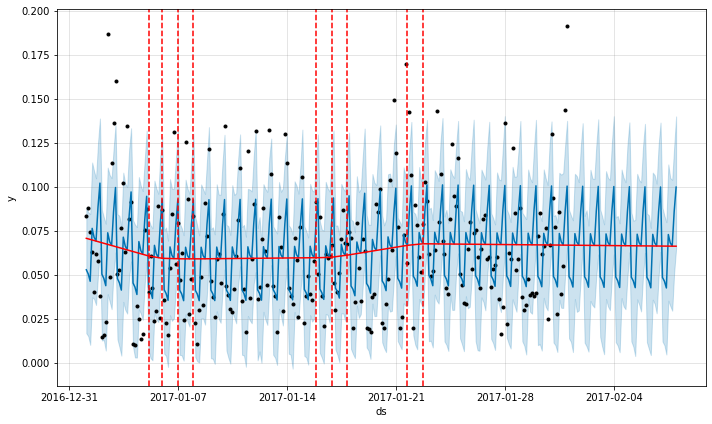

In [8]:
pred1 = m1.predict(future1)
fig = m1.plot(pred1)
a = add_changepoints_to_plot(fig.gca(), m1, pred1)

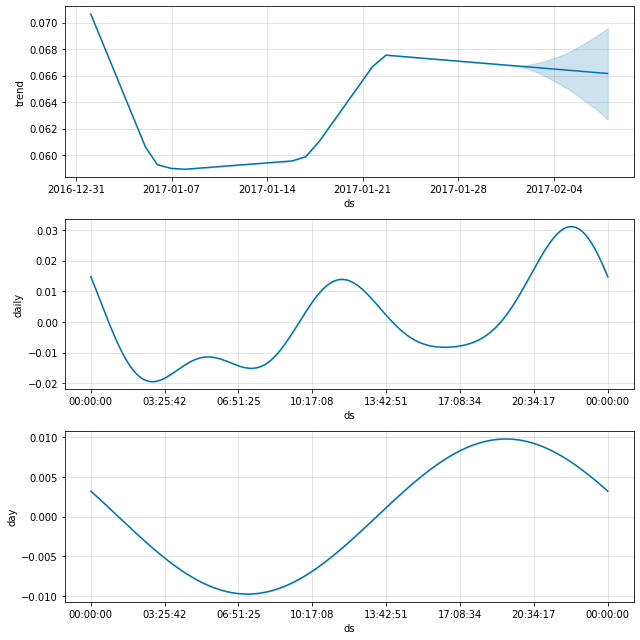

In [9]:
fig = m1.plot_components(pred1)

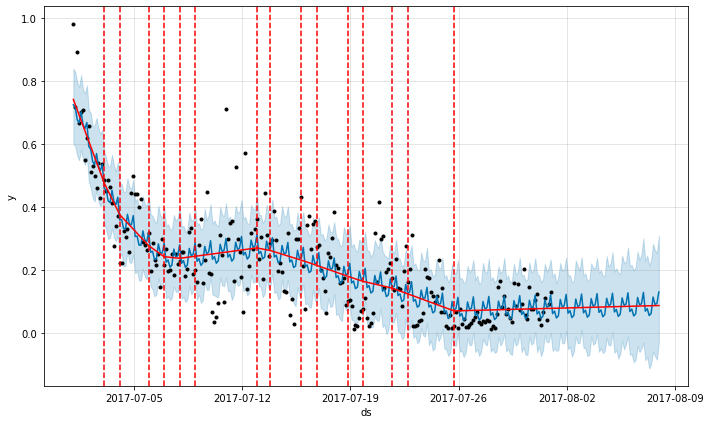

In [10]:
pred2 = m2.predict(future2)
fig = m2.plot(pred2)
a = add_changepoints_to_plot(fig.gca(), m2, pred2)

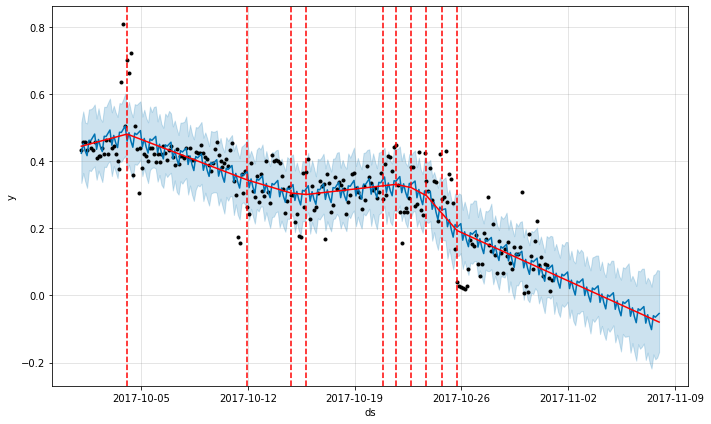

In [11]:
pred3 = m3.predict(future3)
fig = m3.plot(pred3)
a = add_changepoints_to_plot(fig.gca(), m3, pred3)

In [12]:
train_pred1 = pred1.iloc[:-56, :]['yhat'].values
train_pred2 = pred2.iloc[:-56, :]['yhat'].values
train_pred3 = pred3.iloc[:-56, :]['yhat'].values

test_pred1 = pred1.iloc[-56:, :]['yhat'].values
test_pred2 = pred2.iloc[-56:, :]['yhat'].values
test_pred3 = pred3.iloc[-56:, :]['yhat'].values

print('Train: ')
print(NSE(y_train1, train_pred1), NSE(y_train2, train_pred2), NSE(y_train3, train_pred3))
print('Test: ')
print(NSE(y_test1, test_pred1), NSE(y_test2, test_pred2), NSE(y_test3, test_pred3))

Train: 
-353.39494854512 68.00475606066841 82.31065025623101
Test: 
-310.0563060126465 -69.09135492254825 -8.502953155549509


# 2018

In [13]:
train_test1 = pd.read_csv('../input/train_test1.csv')
train_test2 = pd.read_csv('../input/train_test2.csv')
train_test3 = pd.read_csv('../input/train_test3.csv')

In [14]:
train1 = train_test1.loc[train_test1['Qi'].notnull(), :]
# test1 = train_test1.loc[train_test1['Qi'].isnull(), :]
y_train1 = train1['Qi'].values

train2 = train_test2.loc[train_test2['Qi'].notnull(), :]
# test2 = train_test2.loc[train_test2['Qi'].isnull(), :]
y_train2 = train2['Qi'].values

train3 = train_test3.loc[train_test3['Qi'].notnull(), :]
# test3 = train_test3.loc[train_test3['Qi'].isnull(), :]
y_train3 = train3['Qi'].values

In [15]:
data = [train1, train2, train3]
for i in data:
    i.sort_values(by='TimeStample', inplace=True)
    i['ds'] = pd.to_datetime(i['TimeStample'])
    i.rename(columns={'Qi': 'y'}, inplace=True)
    i.drop(['TimeStample'], axis=1, inplace=True)

In [16]:
# m1 = Prophet(changepoint_prior_scale=0.5,
#              daily_seasonality=True,
#              yearly_seasonality=False,
#              weekly_seasonality=False)
# m1.add_seasonality(name='day', period=1, fourier_order=1)
# m1.fit(train1)

m1 = Prophet()
m1.fit(train1)

m2 = Prophet(changepoint_prior_scale=0.5,
             daily_seasonality=True,
             yearly_seasonality=False,
             weekly_seasonality=False)
m2.add_seasonality(name='day', period=1, fourier_order=1)
m2.fit(train2)

m3 = Prophet(changepoint_prior_scale=0.5,
             daily_seasonality=True,
             yearly_seasonality=False,
             weekly_seasonality=False)
m3.add_seasonality(name='day', period=1, fourier_order=1)
m3.fit(train3)


future1 = m1.make_future_dataframe(periods=56, freq='3H')
future2 = m2.make_future_dataframe(periods=56, freq='3H')
future3 = m3.make_future_dataframe(periods=56, freq='3H')

# print(future1.head().append(future1.tail()))
# print(future2.head().append(future2.tail()))
# print(future3.head().append(future3.tail()))

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.


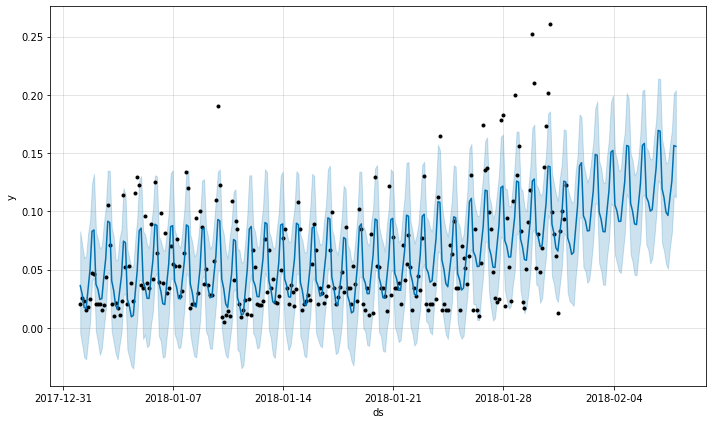

In [17]:
pred1 = m1.predict(future1)
m1.plot(pred1);

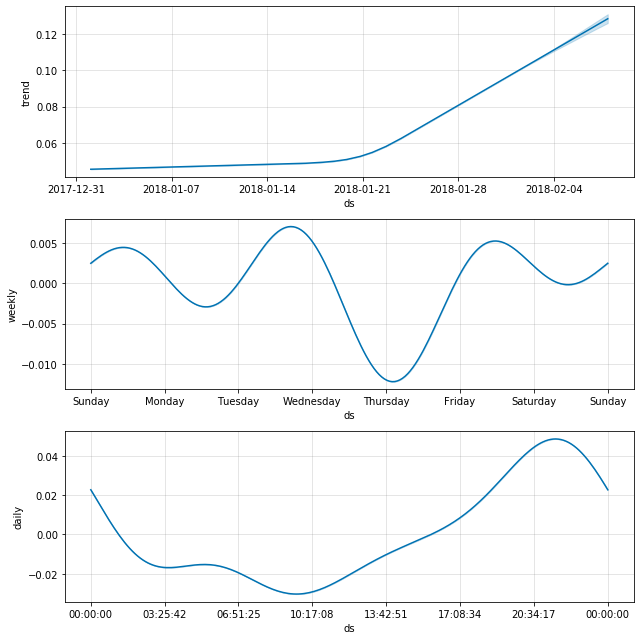

In [18]:
m1.plot_components(pred1);

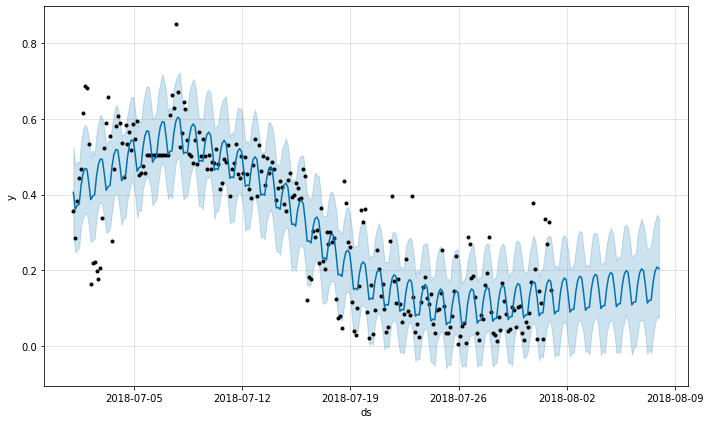

In [19]:
pred2 = m2.predict(future2)
m2.plot(pred2);

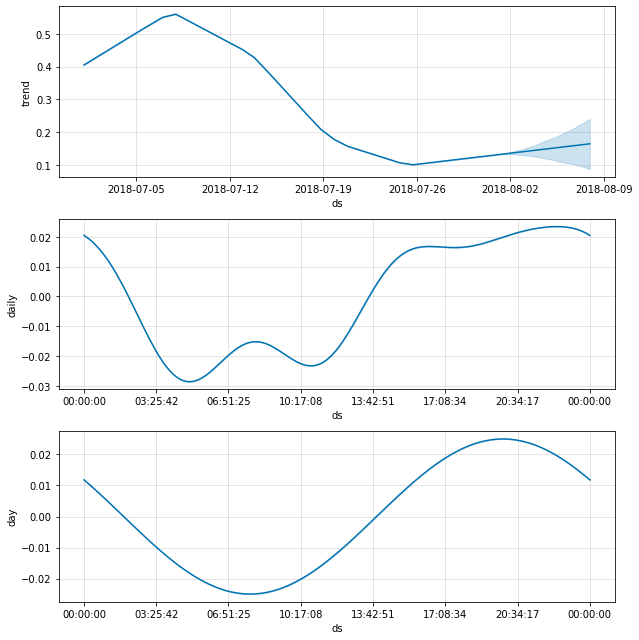

In [20]:
m2.plot_components(pred2);

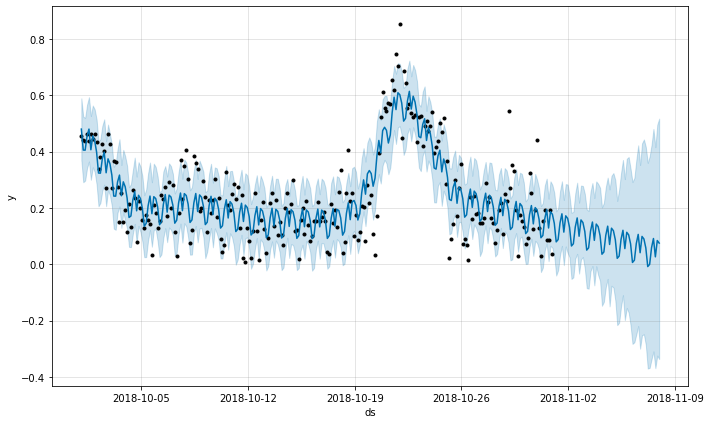

In [21]:
pred3 = m3.predict(future3)
m3.plot(pred3);

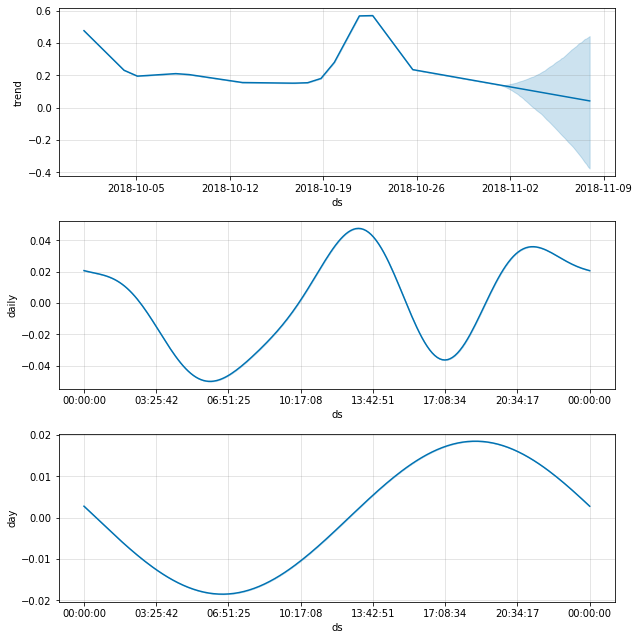

In [22]:
m3.plot_components(pred3);

In [23]:
train_pred1 = pred1.iloc[:-56, :]['yhat'].values
train_pred2 = pred2.iloc[:-56, :]['yhat'].values
train_pred3 = pred3.iloc[:-56, :]['yhat'].values

test_pred1 = pred1.iloc[-56:, :]['yhat'].values
test_pred2 = pred2.iloc[-56:, :]['yhat'].values
test_pred3 = pred3.iloc[-56:, :]['yhat'].values

NSE(y_train1, train_pred1), NSE(y_train2, train_pred2), NSE(y_train3, train_pred3)

(19.2352065986096, -37.846522029037494, 74.77332803855002)

In [24]:
cols = ['Prediction{}'.format(i) for i in range(1, 57)]

sub1 = pd.DataFrame(test_pred1).T
sub1.columns = cols
sub1['SeqNum'] = 1
sub1 = sub1[['SeqNum'] + cols]

sub2 = pd.DataFrame(test_pred2).T
sub2.columns = cols
sub2['SeqNum'] = 2
sub2 = sub1[['SeqNum'] + cols]

sub3 = pd.DataFrame(test_pred3).T
sub3.columns = cols
sub3['SeqNum'] = 3
sub3 = sub1[['SeqNum'] + cols]

sub = pd.concat([sub1, sub2, sub3])
sub.to_csv('../sub/sub_prophet.csv', index=False)